In [104]:
# Libraries for handling numeric computation and dataframes
import pandas as pd
import numpy as np
# Libraries for statistical plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [105]:
rides = pd.read_csv('uber_rides.csv')
rides.head()

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Fare Currency
0,458,Black,COMPLETED,2021-01-13 22:06:46 +0000 UTC,2021-01-13 22:11:10 +0000 UTC,-23.599752,-46.715954,2021-01-13 22:29:13 +0000 UTC,-23.559359,-46.666542,4.84,29.63,BRL
1,458,VIP,COMPLETED,2021-01-13 20:21:05 +0000 UTC,2021-01-13 20:27:29 +0000 UTC,-23.559298,-46.666454,2021-01-13 20:54:50 +0000 UTC,-23.599585,-46.715717,5.31,20.86,BRL
2,458,VIP,COMPLETED,2021-01-03 00:23:22 +0000 UTC,2021-01-03 00:33:00 +0000 UTC,-23.626593,-46.659410,2021-01-03 00:50:56 +0000 UTC,-23.559273,-46.666595,5.90,34.23,BRL
3,458,VIP,COMPLETED,2020-12-11 23:16:33 +0000 UTC,2020-12-11 23:27:32 +0000 UTC,-23.559410,-46.666435,2020-12-12 00:32:47 +0000 UTC,-23.425755,-46.481190,19.74,58.77,BRL
4,458,VIP,COMPLETED,2020-12-11 00:35:46 +0000 UTC,2020-12-11 00:46:46 +0000 UTC,-23.584846,-46.663590,2020-12-11 00:57:57 +0000 UTC,-23.559261,-46.666510,2.54,12.63,BRL


In [106]:
#info
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  554 non-null    int64  
 1   Product Type          551 non-null    object 
 2   Trip or Order Status  554 non-null    object 
 3   Request Time          554 non-null    object 
 4   Begin Trip Time       554 non-null    object 
 5   Begin Trip Lat        525 non-null    float64
 6   Begin Trip Lng        525 non-null    float64
 7   Dropoff Time          554 non-null    object 
 8   Dropoff Lat           525 non-null    float64
 9   Dropoff Lng           525 non-null    float64
 10  Distance (miles)      554 non-null    float64
 11  Fare Amount           554 non-null    float64
 12  Fare Currency         551 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 56.4+ KB


In [107]:
rides.isna().sum()

City                     0
Product Type             3
Trip or Order Status     0
Request Time             0
Begin Trip Time          0
Begin Trip Lat          29
Begin Trip Lng          29
Dropoff Time             0
Dropoff Lat             29
Dropoff Lng             29
Distance (miles)         0
Fare Amount              0
Fare Currency            3
dtype: int64

In [108]:
rides=rides.dropna()
rides.isna().sum()


City                    0
Product Type            0
Trip or Order Status    0
Request Time            0
Begin Trip Time         0
Begin Trip Lat          0
Begin Trip Lng          0
Dropoff Time            0
Dropoff Lat             0
Dropoff Lng             0
Distance (miles)        0
Fare Amount             0
Fare Currency           0
dtype: int64

In [109]:
# Checking categories in product_type column
print(rides['Product Type'].value_counts())
# Categories reclassification
product_mapping = {'UberX':'UberX','uberX':'UberX','uberX VIP':'UberX','VIP':'UberX','POOL':'Pool','POOL: MATCHED':'Pool','UberBLACK': 'Black',
                   'uberx':'UberX','uberPOOL':'Pool','uberPOOL: MATCHED':'Pool','Pool: MATCHED':'Pool'}
# New categories replacement
rides['Product Type'].replace(product_mapping, inplace=True)
# Checking new categories in product_type column
print(rides['Product Type'].value_counts())

UberX                   166
uberX                   140
uberX VIP                81
VIP                      69
POOL                     26
UberEATS Marketplace     10
POOL: MATCHED             8
Pool                      6
uberPOOL: MATCHED         5
uberPOOL                  5
Pool: MATCHED             4
Black                     3
UberBLACK                 1
uberx                     1
Name: Product Type, dtype: int64
UberX                   457
Pool                     54
UberEATS Marketplace     10
Black                     4
Name: Product Type, dtype: int64


In [110]:
rides = rides[rides['Product Type']!='UberEATS Marketplace']
print(rides['Product Type'].value_counts())


UberX    457
Pool      54
Black      4
Name: Product Type, dtype: int64


In [111]:
# Library for manipulating dates and times
from datetime import datetime
from datetime import timedelta
# Function to convert features to datetime
def date_convertion(df, cols):
  for col in cols:
    df[col] = df[col].apply(lambda x: x.replace(' +0000 UTC', ''))
    df[col] = pd.to_datetime(df[col])
  return df
# Applying date_convertion function to date features 
rides = date_convertion(rides, ['Request Time', 'Begin Trip Time', 'Dropoff Time'])

In [112]:
rides.head()

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Fare Currency
0,458,Black,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,-46.666542,4.84,29.63,BRL
1,458,UberX,COMPLETED,2021-01-13 20:21:05,2021-01-13 20:27:29,-23.559298,-46.666454,2021-01-13 20:54:50,-23.599585,-46.715717,5.31,20.86,BRL
2,458,UberX,COMPLETED,2021-01-03 00:23:22,2021-01-03 00:33:00,-23.626593,-46.659410,2021-01-03 00:50:56,-23.559273,-46.666595,5.90,34.23,BRL
3,458,UberX,COMPLETED,2020-12-11 23:16:33,2020-12-11 23:27:32,-23.559410,-46.666435,2020-12-12 00:32:47,-23.425755,-46.481190,19.74,58.77,BRL
4,458,UberX,COMPLETED,2020-12-11 00:35:46,2020-12-11 00:46:46,-23.584846,-46.663590,2020-12-11 00:57:57,-23.559261,-46.666510,2.54,12.63,BRL


In [113]:
rides['year'] = rides['Request Time'].map(lambda x: datetime.strftime(x,"%Y"))
rides['month'] = rides['Request Time'].map(lambda x: datetime.strftime(x,"%b"))
rides['weekday'] = rides['Request Time'].map(lambda x: datetime.strftime(x,"%a"))
rides['time'] = rides['Request Time'].map(lambda x: datetime.strftime(x,"%H:%M"))
rides.head()

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Fare Currency,year,month,weekday,time
0,458,Black,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,-46.666542,4.84,29.63,BRL,2021,Jan,Wed,22:06
1,458,UberX,COMPLETED,2021-01-13 20:21:05,2021-01-13 20:27:29,-23.559298,-46.666454,2021-01-13 20:54:50,-23.599585,-46.715717,5.31,20.86,BRL,2021,Jan,Wed,20:21
2,458,UberX,COMPLETED,2021-01-03 00:23:22,2021-01-03 00:33:00,-23.626593,-46.659410,2021-01-03 00:50:56,-23.559273,-46.666595,5.90,34.23,BRL,2021,Jan,Sun,00:23
3,458,UberX,COMPLETED,2020-12-11 23:16:33,2020-12-11 23:27:32,-23.559410,-46.666435,2020-12-12 00:32:47,-23.425755,-46.481190,19.74,58.77,BRL,2020,Dec,Fri,23:16
4,458,UberX,COMPLETED,2020-12-11 00:35:46,2020-12-11 00:46:46,-23.584846,-46.663590,2020-12-11 00:57:57,-23.559261,-46.666510,2.54,12.63,BRL,2020,Dec,Fri,00:35


In [114]:
rides['distance_km'] = round(rides['Distance (miles)']*1.60934,2)
rides['amount_km'] = round(rides['Fare Amount']/rides.distance_km,2)
rides.head()

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Fare Currency,year,month,weekday,time,distance_km,amount_km
0,458,Black,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,-46.666542,4.84,29.63,BRL,2021,Jan,Wed,22:06,7.79,3.80
1,458,UberX,COMPLETED,2021-01-13 20:21:05,2021-01-13 20:27:29,-23.559298,-46.666454,2021-01-13 20:54:50,-23.599585,-46.715717,5.31,20.86,BRL,2021,Jan,Wed,20:21,8.55,2.44
2,458,UberX,COMPLETED,2021-01-03 00:23:22,2021-01-03 00:33:00,-23.626593,-46.659410,2021-01-03 00:50:56,-23.559273,-46.666595,5.90,34.23,BRL,2021,Jan,Sun,00:23,9.50,3.60
3,458,UberX,COMPLETED,2020-12-11 23:16:33,2020-12-11 23:27:32,-23.559410,-46.666435,2020-12-12 00:32:47,-23.425755,-46.481190,19.74,58.77,BRL,2020,Dec,Fri,23:16,31.77,1.85
4,458,UberX,COMPLETED,2020-12-11 00:35:46,2020-12-11 00:46:46,-23.584846,-46.663590,2020-12-11 00:57:57,-23.559261,-46.666510,2.54,12.63,BRL,2020,Dec,Fri,00:35,4.09,3.09


In [115]:
rides['request_lead_time'] = rides['Begin Trip Time']- rides['Request Time']
rides['request_lead_time'] = rides['request_lead_time'].apply(lambda x: round(x.total_seconds()/60,1))
rides.head(2)

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Fare Currency,year,month,weekday,time,distance_km,amount_km,request_lead_time
0,458,Black,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,-46.666542,4.84,29.63,BRL,2021,Jan,Wed,22:06,7.79,3.80,4.4
1,458,UberX,COMPLETED,2021-01-13 20:21:05,2021-01-13 20:27:29,-23.559298,-46.666454,2021-01-13 20:54:50,-23.599585,-46.715717,5.31,20.86,BRL,2021,Jan,Wed,20:21,8.55,2.44,6.4


In [116]:
rides['trip_duration'] = rides['Dropoff Time'] - rides['Begin Trip Time']
rides['trip_duration'] = rides['trip_duration'].apply(lambda x: round(x.total_seconds()/60,1))
rides.head(2)

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,...,Fare Amount,Fare Currency,year,month,weekday,time,distance_km,amount_km,request_lead_time,trip_duration
0,458,Black,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,-46.666542,...,29.63,BRL,2021,Jan,Wed,22:06,7.79,3.80,4.4,18.1
1,458,UberX,COMPLETED,2021-01-13 20:21:05,2021-01-13 20:27:29,-23.559298,-46.666454,2021-01-13 20:54:50,-23.599585,-46.715717,...,20.86,BRL,2021,Jan,Wed,20:21,8.55,2.44,6.4,27.4


In [117]:
rides.loc[(rides['Trip or Order Status'] == 'CANCELED') | (rides['Trip or Order Status'] == 'DRIVER_CANCELED'),'request_lead_time']=np.nan
rides.loc[(rides['Trip or Order Status'] == 'CANCELED') | (rides['Trip or Order Status'] == 'DRIVER_CANCELED'),'amount_km']=np.nan
rides.loc[(rides['Trip or Order Status'] == 'CANCELED') | (rides['Trip or Order Status'] == 'DRIVER_CANCELED'),['Begin Trip Time','Dropoff Time']]= np.nan
rides.head(2)

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,...,Fare Amount,Fare Currency,year,month,weekday,time,distance_km,amount_km,request_lead_time,trip_duration
0,458,Black,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,-46.666542,...,29.63,BRL,2021,Jan,Wed,22:06,7.79,3.80,4.4,18.1
1,458,UberX,COMPLETED,2021-01-13 20:21:05,2021-01-13 20:27:29,-23.559298,-46.666454,2021-01-13 20:54:50,-23.599585,-46.715717,...,20.86,BRL,2021,Jan,Wed,20:21,8.55,2.44,6.4,27.4


Data Analysis

In [118]:
completed_rides = rides[(rides['Trip or Order Status']!='CANCELED')&(rides['Trip or Order Status']!='DRIVER_CANCELED')]

In [119]:
completed_rides.head(2)

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,...,Fare Amount,Fare Currency,year,month,weekday,time,distance_km,amount_km,request_lead_time,trip_duration
0,458,Black,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,-46.666542,...,29.63,BRL,2021,Jan,Wed,22:06,7.79,3.80,4.4,18.1
1,458,UberX,COMPLETED,2021-01-13 20:21:05,2021-01-13 20:27:29,-23.559298,-46.666454,2021-01-13 20:54:50,-23.599585,-46.715717,...,20.86,BRL,2021,Jan,Wed,20:21,8.55,2.44,6.4,27.4


In [120]:
rides=rides.rename(columns={'Product Type':'product_type','Trip or Order Status':'status','Request Time':'request_time','Begin Trip Time':'begin_time','Dropoff Time':'dropoff_time','Dropoff Lat':'dropoff_lat','Dropoff Lng':'dropoff_lng'})
completed_rides=completed_rides.rename(columns={'Product Type':'product_type','Trip or Order Status':'status','Request Time':'request_time','Begin Trip Time':'begin_time','Dropoff Time':'dropoff_time','Dropoff Lat':'dropoff_lat','Dropoff Lng':'dropoff_lng'})

In [121]:
rides.head(2)

,City,product_type,status,request_time,begin_time,Begin Trip Lat,Begin Trip Lng,dropoff_time,dropoff_lat,dropoff_lng,...,Fare Amount,Fare Currency,year,month,weekday,time,distance_km,amount_km,request_lead_time,trip_duration
0,458,Black,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,-46.666542,...,29.63,BRL,2021,Jan,Wed,22:06,7.79,3.80,4.4,18.1
1,458,UberX,COMPLETED,2021-01-13 20:21:05,2021-01-13 20:27:29,-23.559298,-46.666454,2021-01-13 20:54:50,-23.599585,-46.715717,...,20.86,BRL,2021,Jan,Wed,20:21,8.55,2.44,6.4,27.4


a. How many times have I traveled in the past?

Total trips:  444
2016     17
2017    120
2018    146
2019    106
2020     52
2021      3
Name: year, dtype: int64


<AxesSubplot:xlabel='year', ylabel='count'>

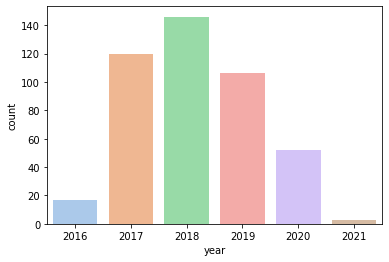

In [122]:
print('Total trips: ', completed_rides.status.count())
print(completed_rides.year.value_counts().sort_index(ascending=True))
sns.countplot(data=completed_rides, x='year',order=['2016','2017','2018','2019','2020','2021'], palette='pastel')

b. How many trips were completed or canceled?

Total trips:  515
COMPLETED          86.2
CANCELED           11.8
DRIVER_CANCELED     1.9
Name: status, dtype: float64


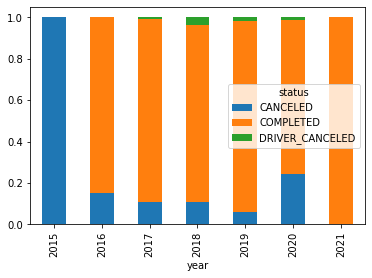

In [123]:
print('Total trips: ', rides.status.count())
print(round(rides.status.value_counts()/rides.status.size*100,1))
#sns.countplot(data=rides, x='year', order=['2015','2016','2017','2018','2019','2020','2021'], hue='status', palette='coolwarm');
rides.groupby(by=['year'])['status'].value_counts(normalize=True).unstack('status').plot.bar(stacked=True);

heatmap

c. Where did most of the layoffs take place?

In [124]:
import folium

In [125]:
from folium import plugins
coord=[]
for lat,lng in zip(completed_rides.dropoff_lat.values,completed_rides.dropoff_lng.values):
  coord.append([lat,lng])
map = folium.Map(
    location=[-23.5489,-46.6388],
    tiles='Stamen Terrain',
    zoom_start=7,
    width='80%', 
    height='50%',
    control_scale=True)
map.add_child(plugins.HeatMap(coord))
map

d. What type of product is most often selected?

       Total Rides     %
UberX          401  90.3
Pool            39   8.8
Black            4   0.9


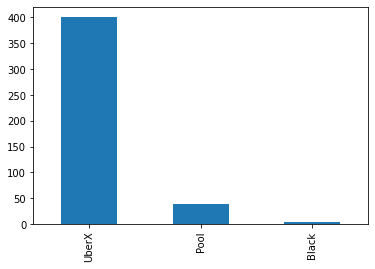

In [126]:
# Creating a serie with product types count
pt_rides = pd.Series(completed_rides.product_type.value_counts().sort_index(ascending=False))
# Transforming serie in dataframe
df = pd.DataFrame(pt_rides)
# Including new column with trips portion
df['%'] = (completed_rides.product_type.value_counts().sort_index(ascending=False)/completed_rides.product_type.size*100).round(1)
#Renaming columns labels
df.rename(columns={'product_type':'Total Rides'}, inplace=True)
print(df)
# Plotting product types count
completed_rides['product_type'].value_counts().plot(kind='bar');

e. How much is the fare, distance, amount, and time spent on the ride?

In [127]:
print('Avg. fare:', round(completed_rides['Fare Amount'].mean(),1),'BRL')
print('Avg. distance:',round(completed_rides.distance_km.mean(),1),'km')
print('Avg. fare/km:',round(completed_rides['Fare Amount'].sum()/completed_rides.distance_km.sum(),1),'BRL/km')
print('Avg. time spent on trips:',round(completed_rides.trip_duration.mean(),1),'minutes')
print('')
print('Total fare amount:', round(completed_rides['Fare Amount'].sum(),1),'BRL')
print('Total distance:',round(completed_rides.distance_km.sum(),1),'km')
print('Total time spent on trips:',round(completed_rides.trip_duration.sum()/60,1),'hours')

Avg. fare: 19.2 BRL
Avg. distance: 8.1 km
Avg. fare/km: 2.4 BRL/km
Avg. time spent on trips: 21.4 minutes

Total fare amount: 8532.8 BRL
Total distance: 3575.0 km
Total time spent on trips: 158.4 hours


f. Which days of the week have the highest number of rides per kilometer?

In [128]:
#overlapping pivot tables to get weighted average
amount_table = completed_rides.pivot_table(values='Fare Amount',aggfunc='sum',columns='weekday', index='year').round(1)
column_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
amount_table = amount_table.reindex(column_order, axis=1)
distance_table = completed_rides.pivot_table(values='distance_km',aggfunc='sum',columns='weekday', index='year').round(1)
distance_table = distance_table.reindex(column_order, axis=1)
(amount_table/distance_table).round(1)

weekday,Mon,Tue,Wed,Thu,Fri,Sat,Sun
year,,,,,,,
2016,NaN,NaN,2.8,2.4,NaN,2.1,2.9
2017,2.8,2.1,2.4,2.2,2.7,2.1,2.7
2018,2.0,1.9,2.6,2.0,2.2,2.4,2.2
2019,2.5,2.4,2.1,2.3,3.1,2.3,2.7
2020,2.7,2.4,2.7,2.6,2.4,3.1,2.8
2021,NaN,NaN,3.1,NaN,NaN,NaN,3.6


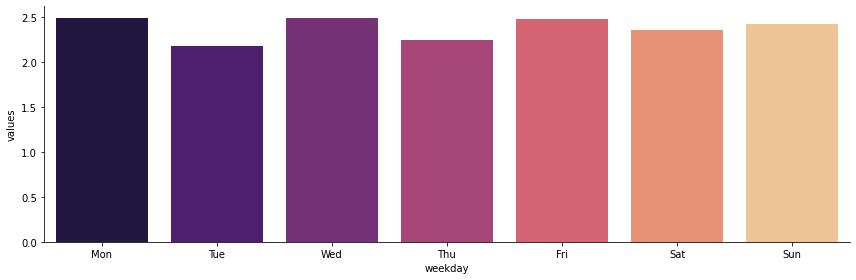

In [129]:
aux_serie = round((completed_rides.groupby('weekday')['Fare Amount'].sum()/completed_rides.groupby('weekday')['distance_km'].sum()),2)                                                                                                                              
amount_km_df = pd.DataFrame(aux_serie)
amount_km_df = amount_km_df.reset_index()
amount_km_df.rename(columns={'weekday':'weekday',0:'values'},inplace=True)
sns.catplot(x='weekday', y='values', data=amount_km_df, kind='bar', height=4, aspect=3, order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],palette='magma');

g. Which is the longest / shortest and most expensive / cheapest ride?

In [130]:
rides_distance = completed_rides[completed_rides.distance_km==completed_rides.distance_km.max()]
rides_distance = rides_distance.append(completed_rides[completed_rides.distance_km==completed_rides.distance_km.min()])
rides_distance

C:\Users\Ak47\AppData\Local\Temp\ipykernel_1428\293587965.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rides_distance = rides_distance.append(completed_rides[completed_rides.distance_km==completed_rides.distance_km.min()])


,City,product_type,status,request_time,begin_time,Begin Trip Lat,Begin Trip Lng,dropoff_time,dropoff_lat,dropoff_lng,...,Fare Amount,Fare Currency,year,month,weekday,time,distance_km,amount_km,request_lead_time,trip_duration
3,458,UberX,COMPLETED,2020-12-11 23:16:33,2020-12-11 23:27:32,-23.559410,-46.666435,2020-12-12 00:32:47,-23.425755,-46.481190,...,58.77,BRL,2020,Dec,Fri,23:16,31.77,1.85,11.0,65.2
305,458,UberX,COMPLETED,2018-04-15 23:18:40,2018-04-15 23:27:42,-23.502636,-46.624952,2018-04-15 23:34:17,-23.503310,-46.636808,...,11.27,BRL,2018,Apr,Sun,23:18,0.24,46.96,9.0,6.6


In [131]:
rides_amount_km = completed_rides[completed_rides.amount_km==completed_rides.amount_km.max()]
rides_amount_km = rides_amount_km.append(completed_rides[completed_rides.amount_km==completed_rides.amount_km.min()])
rides_amount_km

C:\Users\Ak47\AppData\Local\Temp\ipykernel_1428\381551133.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rides_amount_km = rides_amount_km.append(completed_rides[completed_rides.amount_km==completed_rides.amount_km.min()])


,City,product_type,status,request_time,begin_time,Begin Trip Lat,Begin Trip Lng,dropoff_time,dropoff_lat,dropoff_lng,...,Fare Amount,Fare Currency,year,month,weekday,time,distance_km,amount_km,request_lead_time,trip_duration
305,458,UberX,COMPLETED,2018-04-15 23:18:40,2018-04-15 23:27:42,-23.502636,-46.624952,2018-04-15 23:34:17,-23.503310,-46.636808,...,11.27,BRL,2018,Apr,Sun,23:18,0.24,46.96,9.0,6.6
87,458,UberX,COMPLETED,2019-11-30 03:34:56,2019-11-30 03:40:37,-23.591813,-46.690720,2019-11-30 03:53:24,-23.559366,-46.666489,...,0.00,BRL,2019,Nov,Sat,03:34,5.70,0.00,5.7,12.8


h. What is the average lead time before requesting a trip?

In [132]:
print(round(completed_rides.request_lead_time.mean(),1),'minutes')

4.9 minutes
